In this post, we will discuss mainly on the `dog breed classification`. This one is followed what I have learnt and done from [Udacity-Nanodegree program](https://classroom.udacity.com/nanodegrees/nd025-ent/parts/dc09e9a3-1794-4fb9-be8f-0b9082381c1f), across [Machine Learning]() and [Artificial Intellegence]().

# 1. Project definition

Can you know the breed of the dog in the picture below? 

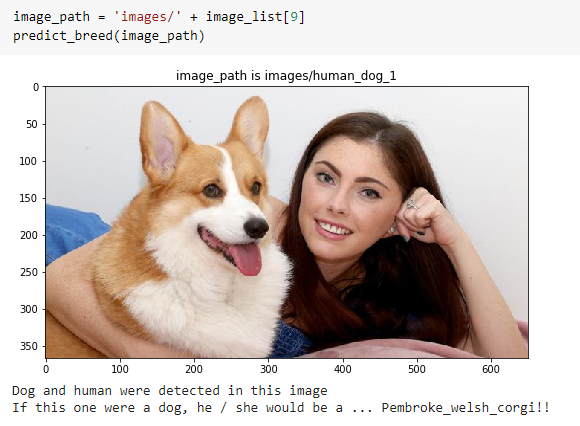

If you known the answer, that meant you are smarter than me, I don't know how many dog breeds until I complete this project. 

## 1.1. Project overview
Well, let's go out and look for a lot of different breeds of dogs while walking on the street and the second thing that we want to know is this breed (wondering what’s the first thing?! His name!). And this why we have this project; the **goal** of this project is to create a web application that is able to identify a breed of dog if given a photo or image as input. If the photo or image contains a human face, then the application will return the breed of dog breed that most face resembles this person.

The dataset in this project is given by [Udacity nanodegree program](https://emc.udacity.com/c/fpt/me), and can be downloaded at 
- [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip)
- [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip)

The project description has been described in this [link](https://github.com/Nhan121/Udaciy_project4_Capstone-Project-Dog_Breed/blob/main/README.md)

## 1.2. Problem statement & strategy

As mentioned in the preceding section, we must solve the **classification problem** of the `dog breeds` by using the Convolution Neural Network models, from scratch and used transfer learning.

In this post, we’ll build the CNN (from scratch) model before using the transfer learning (which can reduce the training time without sacrificing accuracy) then see how the transfer learning can be an effective method to train a machine learning model with fewer data and low compute resources. Then combine this with the `haarcascade_frontalface` algorithm, which stored in [haarcascade_frontalface_default.xml](https://github.com/Nhan121/Udaciy_project4_Capstone-Project-Dog_Breed/blob/main/haarcascades/haarcascade_frontalface_default.xml). Of course, you can do it better if you used [haarcascade_frontalcatface_alt](https://github.com/Nhan121/Udaciy_project4_Capstone-Project-Dog_Breed/blob/main/haarcascades/haarcascade_frontalcatface_alt.xml) or [haarcascade_frontalface_alt2](https://github.com/Nhan121/Udaciy_project4_Capstone-Project-Dog_Breed/blob/main/haarcascades/haarcascade_frontalface_alt2.xml) algorithms

To get more details and understand clearer how the code works, you can refer as follow

- [My Github](https://github.com/Nhan121/Udaciy_project4_Capstone-Project-Dog_Breed)

- [my notebook](https://github.com/Nhan121/Udaciy_project4_Capstone-Project-Dog_Breed/blob/main/dog_app.ipynb)

Look at the dataset, we have `133` total dog categories among `8351` total dog images, so the problem here is **multi-class clasification**. Hence, the `output layer` of the `neural network` must be the same with the number of dog breeds, which be 133 classes. Since, we had to many classes to displayed, I just showed the most 50 dog breeds in our dataset.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/dog-breed-identification/labels.csv')
fig, ax = plt.subplots(1, 1, figsize = (20, 7))
top50 = df.groupby('breed').count().sort_values(by = 'id', ascending = False)[:60].rename(columns = {'id': 'count'})
top50.plot(kind = 'bar', ax = ax)
ax.set_title('Count of top 50 dog breeds in this dataset');
top50.head(10)

The graph above show that the number of dog in each class is **balanced relatively**, and of course, it is **not unbalanced**

- Each uploaded digital-image is a 3D array as

                            ( width, height, number of chanel )
- When using TensorFlow as backend, Keras CNNs require a **4D array** (which we'll also refer to as a [4D tensor](https://towardsdatascience.com/deep-learning-introduction-to-tensors-tensorflow-36ce3663528f)) as input, with shape

                    ( nb_samples, width, height, number of chanel )
where `nb_samples` corresponds to the total number of images (or samples).

- After returning a [4D tensor](https://towardsdatascience.com/deep-learning-introduction-to-tensors-tensorflow-36ce3663528f) suitable for supplying to a [Keras CNN](https://www.tensorflow.org/tutorials/images/cnn), we will load and resizes the image to a **square image** that is $224 \times 224$ pixels.

- For the `activation function` at the **output layer**, I used [softmax](https://machinelearningmastery.com/softmax-activation-function-with-python/) 

$$ \displaystyle \sigma (\mathbf {z} )_{i} = {\frac {e^{z_{i}}}{\sum _{j=1}^{K}e^{z_{j}}}}, \ \ \ \ {\text{ for }}i=1,\dotsc ,K{\text{ and }}\mathbf {z} =(z_{1},\dotsc ,z_{K})\in \mathbb {R} ^{K}. $$

to convert the scores from the `output` into the `probability vectors`, since the sum of all probability-weight $\sigma (\mathbf {z} )_{i}$

$$ \sum_{i=1}^K \sigma (\mathbf {z} )_{i} = \sum_{i=1}^K \left( \frac {e^{z_{i}}}{\sum _{j=1}^{K}e^{z_{j}}} \right) = 1 $$

- For training and evaluation models, I had used the pre-trained model, such as

>- [VGG-19](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogVGG19Data.npz) bottleneck features
>- [ResNet-50](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogResnet50Data.npz) bottleneck features
>- [Inception](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogInceptionV3Data.npz) bottleneck features
>- [Xception](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogXceptionData.npz) bottleneck features

- Then, I had uploaded the [saved-models](https://github.com/Nhan121/Udaciy_project4_Capstone-Project-Dog_Breed/tree/main/saved_models) (in [My Github](https://github.com/Nhan121/Udaciy_project4_Capstone-Project-Dog_Breed) ) to build the Convolution Neural Network and get the accuracy 84% on the test-set. Finally, we will combine both functions `human_face_detection` (used [haarcascade_frontalface_default.xml](https://github.com/Nhan121/Udaciy_project4_Capstone-Project-Dog_Breed/blob/main/haarcascades/haarcascade_frontalface_default.xml)) and `dog_breed` (used [ResNet-50 bottleneck features](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogResnet50Data.npz) ) to detect simultaneously human and dogs.

## 1.3. Metrics.
- As mentioned above, the problem here is multi-class classification, so `loss = 'categorical_crossentropy'`. 
- Beside that, we can use many metrics to evaluate this model, such as `accuracy, f1-score, precison, recall, AUC-ROC, etc`, but here I set `metrics=['accuracy']` to display it belong with the `loss` in the training process (i will explain this in the later paragraph)
- Finally, I set the `optimizer` = ['rmsprop'](https://keras.io/api/optimizers/rmsprop/) to
>- Maintain a moving (discounted) average of the square of gradients
>- Divide the gradient by the root of this average

#### Why I choose the accuracy instead of F1-score or precison, recall
One way to assess a classification model's performance is to use a "confusion matrix", which compares actual values (from the test set) to predicted values (and computed by the 4 basic element; TP, TN, FP and FN, which be explained below). Be careful though, the figures are highly dependent on the probability cutoff chosen to classify a record. Depending on your use case, you might want to adjust the cutoff to optimize a specific metric.
- Firstly, you must know the concept of the 4 basic elements: 
>- TP (true positive) : is an outcome where the model correctly predicts the positive class.
>- TN (true negative): is an outcome where the model correctly predicts the negative class.
>- FP (false positive): is an outcome where the model incorrectly predicts the positive clas
>- FN (false negative): is an outcome where the model incorrectly predicts the negative class.

- The **`Classification accuracy`** is the **simplest metrics** one can imagine, and is the proportion of correct predictions among all records ("positive" and "negative"). It is **less informative than F1-score for unbalanced dataset**

$$ \text{accuracy} = \dfrac{\text{TN + TP}}{TP + TN +FP + FN} $$

- **`Precision`**: Proportion of correct (“positive“) predictions among “positive” predictions, which meant

$$ \text{precison} = \dfrac{\text{TP}}{TP + FP} $$

- **`Recall`**: Proportion of (correct) “positive“ predictions among “positive” records, likewise

$$ \text{recall} = \dfrac{\text{TP}}{TP + FP} $$

- **`F1-score`**: Harmonic mean between precision and recall, which meant

$$ \text{F1_score} = 2\dfrac{\text{precison * recall}}{\text{precison + recall}} $$

But our problem is **"multi-class classification"** (we did not consider which class meant correct as in a binary classification), and our dataset is relatively balanced between each class, so I don't use the `precison, recall` and `f1-score` **but** choosing **`accuracy`**


#### Model compile

Hence, we set up the model.compile as follow

                                    model.compile(optimizer = 'rmsprop', 
                                                  loss = 'categorical_crossentropy', 
                                                  metrics=['accuracy'])                                                  


# 2. Analysis
## 2.1. Strategy
As discussed above, we must detect both human and dogs in an image, so we need the following strategies:


* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Use a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 6](#step6): Write your Algorithm
* [Step 7](#step7): Test Your Algorithm

## 2.2. Data Exploration & visualization
- In this post, we will write the function to accept **a file path to an image and first determines whether the image contains a human, dog, both, or neither**.
- So firstly, we must understand how to detect the number of human-face in an image. Hence, we used [OpenCV's implementation of Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images. The `OpenCV` provides many `pre-trained face detectors`, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory. Look at the following result

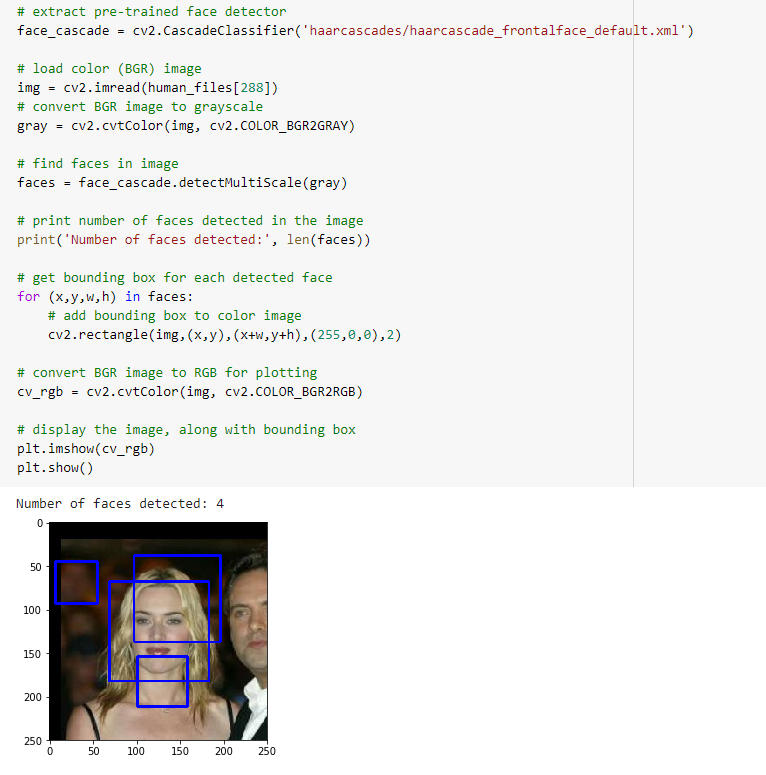

Look at the results, the algorithm detected 4 faces in the image, but this algorithm is not good. Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

- Next, how can we detect a dog? We use a pre-trained [ResNet-50](http://ethereon.github.io/netscope/#/gist/db945b393d40bfa26006) model to detect dogs in images.  
>- Our first line of code

            from keras.applications.resnet50 import ResNet50
            ResNet50_model = ResNet50(weights = 'imagenet')
downloads the ResNet-50 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a). 
>- Given an image, this pre-trained ResNet-50 model returns a prediction (derived from the available categories in ImageNet) for the object that is contained in the image.

>- You can read more in [my notebook](https://github.com/Nhan121/Udaciy_project4_Capstone-Project-Dog_Breed/blob/main/dog_app.ipynb),

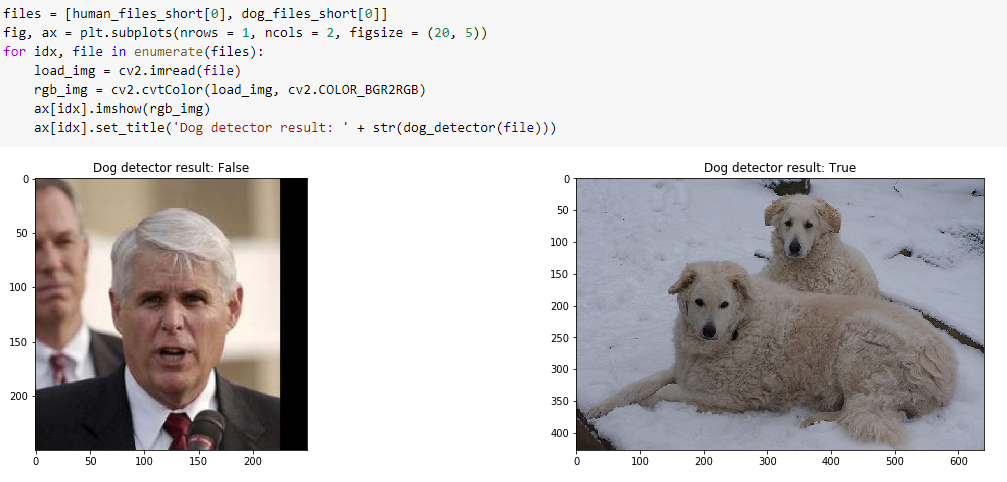

to get more detail, the ResNet50 has detected the number of dog as well as the number of human face,

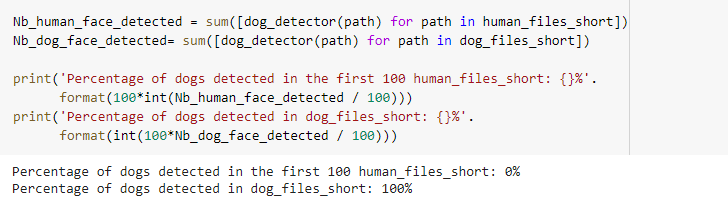

- Finally, we will introduce the methodology to build the function to detect dog and classify dog-breed among 133 classes; and it will be discussed in the comming-up next section!

# 3.Methodology
In my Github, I had used 3 different models to predict the dog-breed, but only the final model [ResNet50 bottleneck](https://github.com/Nhan121/Udaciy_project4_Capstone-Project-Dog_Breed/blob/main/saved_models/weights.best.Resnet50.hdf5) return the highest accuracy among of my [saved_models](https://github.com/Nhan121/Udaciy_project4_Capstone-Project-Dog_Breed/tree/main/saved_models)

But firstly, note that you should satify the following requirement packages:


            opencv-python==3.2.0.6
            h5py==2.6.0
            matplotlib==2.0.0
            numpy==1.12.0
            scipy==0.18.1
            tqdm==4.11.2
            keras==2.0.2
            scikit-learn==0.18.1
            pillow==4.0.0
            ipykernel==4.6.1
            tensorflow==1.0.0

## 3.1. Data Preprocessing
- For the first model, I had **re-sized** the size of the input image to 224x224 pixel then **rescaled** the images by dividing every pixel in every image by 255, before using the Convolution neural network on this. you can read more at [step 3]() in [my notebook](https://github.com/Nhan121/Udaciy_project4_Capstone-Project-Dog_Breed/blob/main/dog_app.ipynb)

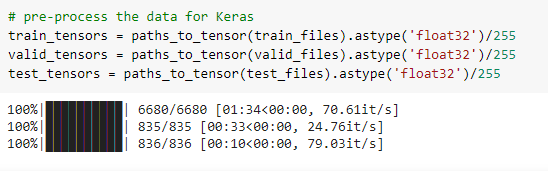

- In the last 2 models, we used the **transfer learning** to create a CNN using bottleneck features such as [VGG-19](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogVGG19Data.npz) and [ResNet-50](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogResnet50Data.npz). Except these pre-trained model, you can use the features for all of the networks that are currently available in Keras, such as

>- [Inception](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogInceptionV3Data.npz) bottleneck features
>- [Xception](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogXceptionData.npz) bottleneck features

## 3.2. Implementation
As we mentioned above, all of my project has been used `metric = [accuracy]` and `loss = [categorical_crossentropy]`, so we in this part, we just focus on the different of the algorithms in each model.
### Model architecture on CNN model (from Scratch)
I had used the **simple model** as below

- I used 3 Convolutional Layers with 16, 32, 64 filters respectively in order to discover features from the images.
- Beside that, between these convolutional layers; added a Max Pooling Layer.
- I used a Dense Layer with a ReLU as an activation functions at the convolutional layers.
- For the output layer, I used a softmax activation function to get results in percentage.
- Moreover, I had added the Dropout to prevent overfiting

Look at the code below

In [ ]:
model = Sequential()
model.add(Conv2D(16, kernel_size = 2, strides = (1, 1),
                 input_shape = (224, 224, 3),
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2, strides = (2, 2), padding = 'valid'))
model.add(Conv2D(32, kernel_size = 2, 
                 strides = (1, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2, strides = (2, 2), padding = 'same'))
model.add(Conv2D(64, kernel_size = 2, 
                 strides = (1, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2, strides = (2, 2), padding = 'same'))
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.25))
model.add(Dense(133, activation = 'softmax'))
model.summary()

But the result of the first model is not good, we will discuss in section [4. Results](), but now I will introduce the method to reduce training time without sacrificing accuracy, we show you how to train a CNN using transfer learning.

## 3.3. Refinement

### 3.3.1. Model architecture of VGG16
- `"The model VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes. Due to its depth and number of fully-connected nodes, VGG16 is over 533MB. This makes deploying VGG a tiresome task.VGG16 is used in many deep learning image classification problems; however, smaller network architectures are often more desirable (such as SqueezeNet, GoogLeNet, etc.). But it is a great building block for learning purpose as it is easy to implement"` [Readmore](https://neurohive.io/en/popular-networks/vgg16/)

- In our problem, we only add a global average pooling layer and a fully connected layer, where the latter contains one node for each dog category and is equipped with a softmax activation function in the output layer.
- Also, we must load the bottleneck feature from "VGG16Data.npz" then assigned it into `train_VGG16`, `valid_VGG16` and `test_VGG16`

In [ ]:
VGG16_model = Sequential()
VGG16_model.add(GlobalAveragePooling2D(input_shape = train_VGG16.shape[1:]))
VGG16_model.add(Dropout(0.1))
VGG16_model.add(Dense(133, activation='softmax'))

VGG16_model.summary()

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
im = Image.open(r"../input/images-show/resnet50bottle_neck.png")
plt.figure(figsize = (20, 10))
plt.imshow(im)
plt.axis("off")
plt.show()

Likewise, the result on the VGG16 model is not good at all, so I decide using `ResNet50` bottleneck features

### 3.3.2. Model architecture on ResNet50 with bottleneck feature
- The ResNet architecture was in 2015 in the paper [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385). ResNet has a different network than VGG16. It consists of `micro-architectures` that are stacked on top of each other. 
- ResNet won the ILSVRC competition in 2015 and surpassed human performance on the ImageNet dataset.
- Come back our problem, here I also added a fully connected layer with 512 nodes and a ReLU activation function to detect more patterns and a Dropout to avoid overfitting.

In [ ]:
res50net_model = Sequential()
res50net_model.add(GlobalAveragePooling2D(input_shape = train_res50net.shape[1:]))
res50net_model.add(Dense(512, activation='relu'))
res50net_model.add(Dropout(0.2))
res50net_model.add(Dense(133, activation='softmax'))
res50net_model.summary()

where the `train_res50net` is loaded from the bottleneck feature at `"DogResnet50Data.npz"`.

Now, we will discuss on the results of these 3 models.

# 4. Results
## 4.1. Model Evaluation and Validation
- In the first model, I ran it on 3 epochs but this took a lots of time at each epoch, and the accuracy is really bad, nearly 1.57% accuracy on the test-set

In [ ]:
im = Image.open(r"../input/images-show/fig4.png")
plt.figure(figsize = (20, 10))
plt.imshow(im)
plt.axis("off")
plt.show()

- The second one, this case the accuracy has been improved better but only get 50% accuracy on the training set after 20 epochs. On the test-set, the accuracy is about 43%, which is `relatively worse`.

In [ ]:
im = Image.open(r"../input/images-show/fig8.png")
plt.figure(figsize = (20, 10))
plt.imshow(im)
plt.axis("off")
plt.show()

- In the lastest model, everything now has been improved at all, 
>- After 5 epochs, the `validation_accuracy` has attained 77% accuracy while the `train_accuracy` was 82%.
>- After 200 epochs, the `validation_accuracy` just over 82% accuracy while the `train_accuracy` was over 97%.
>- The final accuracy on the test-set is about 84%.

In [ ]:
im = Image.open(r"../input/images-show/fig9.png")
plt.figure(figsize = (20, 10))
plt.imshow(im)
plt.axis("off")
plt.show()

## 4.2. Justification
The last 2 models with `bottleneck` feature above VGG16 and ResNet50 **reduced** the training time and totally improved the accuracy on the test-set, compared to the CNN (from scratch) model. 
- Since we had used the pre-trained model and **increased the depth of neural network**. For example the `VGG16` used 16 layers,
>- 13 Convolutional layers (2 layer conv-conv, 3 layer conv-conv-conv) used `kernel-size =  3×3`, 
>- After each convolutional layer is a maxpooling, downsize to 0.5, 
>- and 3 fully connected layers.

In [ ]:
im = Image.open(r"../input/images-show/vgg16.jpg")
plt.figure(figsize = (20, 10))
plt.imshow(im)
plt.axis("off")
plt.show()

- Next, the final algoritm `ResNet50 bottleneck` returns the good accuracy on the test-set. To understand ResNet we need to understand the problems of layering when training, the first problem when the model increases deeper than the gradient will disappear/explode. This problem can be solved by adding Batch Normalization, it helps to normalize the output to help the coefficients become more balanced, not too small or too large, so it will help the model to converge more easily. The 2nd problem is attenuation, As the model with deeper accuracy starts to saturate (saturate) even decrease. As shown below when stacking more layers, the retraining error is higher than less layers so the problem is not overfitting. The problem is that the model that is not easy to train is more difficult to learn, try the object to train a shallow model, then we stack more layers, the added layers will not learn anything (map recognition) so accuracy will be similar to shallow model without increase. Resnet was born to solve this degradation problem.

In [ ]:
im = Image.open(r"../input/images-show/fig11.png")
plt.figure(figsize = (20, 10))
plt.imshow(im)
plt.axis("off")
plt.show()

In [ ]:
im = Image.open(r"../input/images-show/fig12.png")
plt.figure(figsize = (20, 10))
plt.imshow(im)
plt.axis("off")
plt.show()

# 5. Conclusion (reflection & improvement)
## Need to improve
Overall, the algorithm is working good as I expected; **but** the output could be improved better if

>- We used the function `face_detector2` to replace `face_detector`
>- We used `Image Augmentation`
>- Prevent overfiting by using `Dropout` better (for example `Dropout(0.3)` )
>- We have more images for training
>- Increasing the depth of the neural network (for example VGG19, InceptionNetV5, etc)

## Refection
The difficulties that I have meet in this projects be:
- My best model is also has the overfitting problem since the `test_acc = 0.85` while the `train_acc > 0.97`. To solve this problem, I think we must use the median-kernel to smooth the image (image bluring) or increase the Dropout in the Neural Network.
- In many image, the dog and human can not be detected, I think the reason can be the filter-application that they used to took a photo or the faces were leaning (not in frontal). For example


In [ ]:
im = Image.open(r"../input/images-show/end.png")
plt.figure(figsize = (20, 10))
plt.imshow(im)
plt.axis("off")
plt.show()

# 6. References
- https://towardsdatascience.com/creating-deeper-bottleneck-resnet-from-scratch-using-tensorflow-93e11ff7eb02
- https://github.com/Nhan121/Udaciy_project4_Capstone-Project-Dog_Breed
- https://en.wikipedia.org/wiki/Rectifier_(neural_networks)
- https://neurohive.io/en/popular-networks/vgg16/